In [2]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='phoJBS94pRMyU4bcjhVACPwX2Jv_EJGAqDGKgtgLQSaz',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'universityeligibilitypredictor-donotdelete-pr-rkez9jcau88tf6'
object_key = 'Admission_Predict (1).csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)
data.head()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
data.drop(["Serial No."], axis=1, inplace=True)

In [6]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [7]:
data.describe

<bound method NDFrame.describe of      GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
0          337          118                  4  4.5   4.5  9.65         1   
1          324          107                  4  4.0   4.5  8.87         1   
2          316          104                  3  3.0   3.5  8.00         1   
3          322          110                  3  3.5   2.5  8.67         1   
4          314          103                  2  2.0   3.0  8.21         0   
..         ...          ...                ...  ...   ...   ...       ...   
395        324          110                  3  3.5   3.5  9.04         1   
396        325          107                  3  3.0   3.5  9.11         1   
397        330          116                  4  5.0   4.5  9.45         1   
398        312          103                  3  3.5   4.0  8.78         0   
399        333          117                  4  5.0   4.0  9.66         1   

     Chance of Admit   
0                

In [8]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


**Handling Missing Values**

In [9]:
data.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

**Data Visualization**

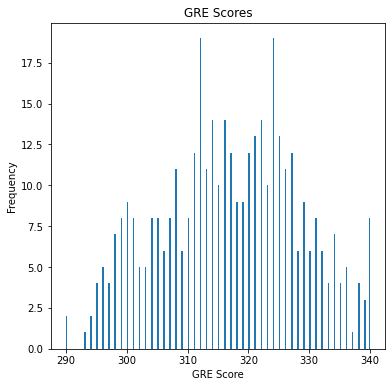

In [10]:
data["GRE Score"].plot(kind = 'hist',bins = 200,figsize = (6,6))

plt.title("GRE Scores")
plt.xlabel("GRE Score")
plt.ylabel("Frequency")

plt.show()

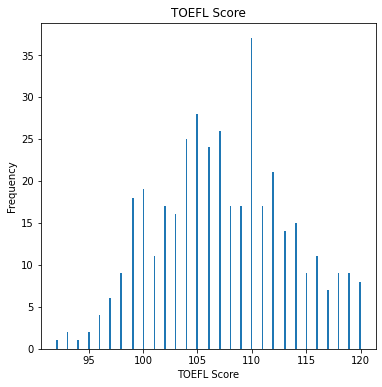

In [11]:
data["TOEFL Score"].plot(kind = 'hist',bins = 200,figsize = (6,6))

plt.title("TOEFL Score")
plt.xlabel("TOEFL Score")
plt.ylabel("Frequency")

plt.show()

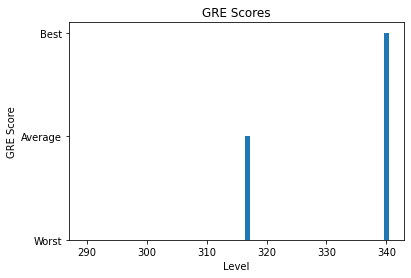

In [12]:
g = np.array([data["GRE Score"].min(),data["GRE Score"].mean(),data["GRE Score"].max()])
h = ["Worst","Average","Best"]
plt.bar(g,h)

plt.title("GRE Scores")
plt.xlabel("Level")
plt.ylabel("GRE Score")

plt.show()

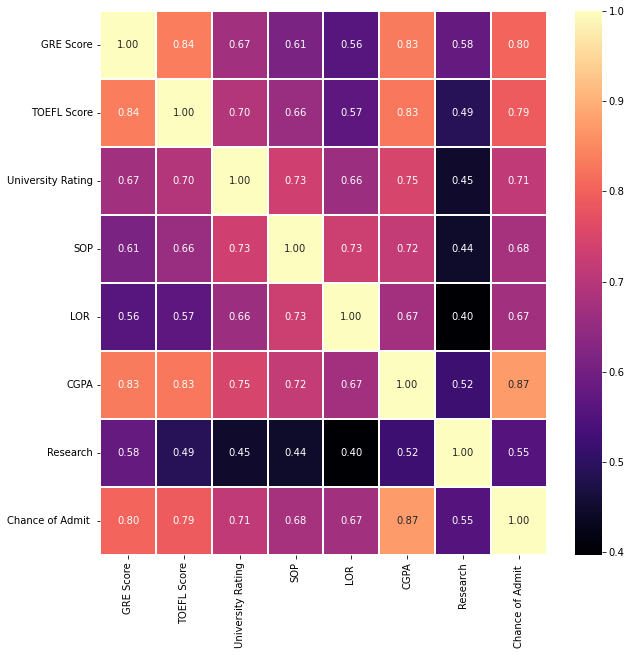

In [13]:
plt.figure(figsize=(10, 10))

sns.heatmap(data.corr(), annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")

plt.show()

<AxesSubplot:xlabel='University Rating', ylabel='count'>

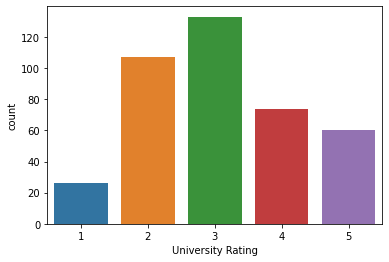

In [14]:
data.Research.value_counts()

sns.countplot(x="University Rating",data=data)

**Training and Testing Split**

In [15]:
X=data.drop(['Chance of Admit '],axis=1) 
y=data['Chance of Admit '] 

In [16]:
from sklearn.model_selection import train_test_split 
X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size=0.15)

In [17]:
X_Train.shape

(340, 7)

In [18]:
y_Train.shape

(340,)

In [19]:
y_Test.shape

(60,)

In [20]:
X_Test.shape

(60, 7)

**MODELING AND TRAINING**

In [21]:
from sklearn.ensemble import GradientBoostingRegressor
rgr = GradientBoostingRegressor()
rgr.fit(X_Train,y_Train)

GradientBoostingRegressor()

In [22]:
rgr.score(X_Test,y_Test)

0.7671713619659117

In [23]:
y_predict=rgr.predict(X_Test)

In [24]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import numpy as np
print('Mean Absolute Error:', mean_absolute_error(y_Test, y_predict))  
print('Mean Squared Error:', mean_squared_error(y_Test, y_predict))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_Test, y_predict)))

Mean Absolute Error: 0.046305317474025234
Mean Squared Error: 0.004123259362878181
Root Mean Squared Error: 0.06421261062188782


In [25]:
y_train = (y_Train>0.5)
y_test = (y_Test>0.5)
y_train

287    True
66     True
15     True
47     True
393    True
       ... 
387    True
223    True
275    True
246    True
134    True
Name: Chance of Admit , Length: 340, dtype: bool

In [56]:
from sklearn.linear_model._logistic import LogisticRegression

lore = LogisticRegression(random_state=0, max_iter=1000)

lr = lore.fit(X_Train, y_train)

In [57]:
y_pred = lr.predict(X_Test)

In [58]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix

print('Accuracy Score:', accuracy_score(y_test, y_pred))  
print('Recall Score:', recall_score(y_test, y_pred))  
print('ROC AUC Score:', roc_auc_score(y_test, y_pred))
print('Confussion Matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy Score: 0.95
Recall Score: 0.9818181818181818
ROC AUC Score: 0.790909090909091
Confussion Matrix:
 [[ 3  2]
 [ 1 54]]


In [67]:
import pickle

In [60]:
pickle.dump(lr, open("university.pkl", "wb")) #logistic regression model
pickle.dump(rgr, open("university_percent.pkl", "wb")) #regression model

In [68]:
lr = pickle.load(open("university.pkl", "rb")) #logistic regression model
gd = pickle.load(open("university_percent.pkl", "rb")) #regression model

**IBM deployment**

In [61]:
pip install -U ibm-watson-machine-learning

Note: you may need to restart the kernel to use updated packages.


**Authentication**

In [62]:
from ibm_watson_machine_learning import APIClient
import json

In [63]:
uml_credentials = {
    "url": "https://us-south.ml.cloud.ibm.com",
    "apikey": "kLmQAEgx0aXP45J2FG060MUCY8Iqe5Uj1rI_Zzj78db-"
}

client = APIClient(uml_credentials)

In [64]:
def guid_from_space_name(client, space_name):
    space = client.spaces.get_details()
    idr = []
    for i in space['resources']:
        idr.append(i['metadata']['id'])
    return idr 

In [79]:
space_uid = guid_from_space_name(client, "UNI ADMIT")
print(space_uid[0])

578425c7-033f-414f-9f62-b215604f5a0e


In [78]:
client.set.default_space(space_uid[0])

'SUCCESS'

In [80]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
runtime-22.1-py3.9             12b83a1

In [81]:
import sklearn
sklearn.__version__

'1.0.2'

In [92]:
MODEL_NAME = 'ADMIT'
DEPLOYMENT_NAME = 'UAEP'
DEMO_MODEL = lr

In [93]:
software_spec_uid = client.software_specifications.get_id_by_name('runtime-22.1-py3.9')

In [94]:
model_props = {
    client.repository.ModelMetaNames.NAME: MODEL_NAME,
    client.repository.ModelMetaNames.TYPE: 'scikit-learn_1.0 ',
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid
}

In [95]:
model_details = client.repository.store_model(
    model = DEMO_MODEL,
    meta_props = model_props,
    training_data = X_Train,
    training_target = y_Train 
)
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'label_column': 'Chance of Admit ',
  'schemas': {'input': [{'fields': [{'name': 'GRE Score', 'type': 'int64'},
      {'name': 'TOEFL Score', 'type': 'int64'},
      {'name': 'University Rating', 'type': 'int64'},
      {'name': 'SOP', 'type': 'float64'},
      {'name': 'LOR ', 'type': 'float64'},
      {'name': 'CGPA', 'type': 'float64'},
      {'name': 'Research', 'type': 'int64'}],
     'id': '1',
     'type': 'struct'}],
   'output': []},
  'software_spec': {'id': '12b83a17-24d8-5082-900f-0ab31fbfd3cb',
   'name': 'runtime-22.1-py3.9'},
  'type': 'scikit-learn_1.0'},
 'metadata': {'created_at': '2022-11-05T17:39:28.091Z',
  'id': '31f8c550-8e97-4095-b79e-fbc8bd959ce0',
  'modified_at': '2022-11-05T17:39:30.877Z',
  'name': 'ADMIT',
  'owner': 'IBMid-663003WH2R',
  'resource_key': '2f6e0f73-af21-4313-a5ef-259a34bd7987',
  'space_id': '578425c7-033f-414f-9f62-b215604f5a0e'},
 'system': {'warnings': []}}

In [96]:
model_id = client.repository.get_model_id(model_details)
model_id

'31f8c550-8e97-4095-b79e-fbc8bd959ce0'

In [97]:
deployment_props = {
    client.deployments.ConfigurationMetaNames.NAME:DEPLOYMENT_NAME,
    client.deployments.ConfigurationMetaNames.ONLINE: {}
}

deployment = client.deployments.create(
     artifact_uid = model_id,
     meta_props = deployment_props
)



#######################################################################################

Synchronous deployment creation for uid: '31f8c550-8e97-4095-b79e-fbc8bd959ce0' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.

ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='75f4e51e-f2e5-4edd-b07d-2003f40ca00e'
------------------------------------------------------------------------------------------------


